In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


### In this notebook, it would investigate loan approval prediction

### the source of the dataset is "https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data"

In [36]:
df= pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

In [37]:
# First glance to the data
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [38]:
# get some descriptive statstic
df.describe()
# residential_assets_value	- have negative values, which can be a signal of a bad data

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [39]:
# My task will be construct predictive model for binary classification with target variable "loan_status"

In [40]:
import matplotlib.pyplot as plt

In [41]:
df.columns
# in some colmns are spaces before the text

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

(array([1302.,  858.,  596.,  480.,  355.,  266.,  160.,  140.,   88.,
          24.]),
 array([ -100000.,  2820000.,  5740000.,  8660000., 11580000., 14500000.,
        17420000., 20340000., 23260000., 26180000., 29100000.]),
 <BarContainer object of 10 artists>)

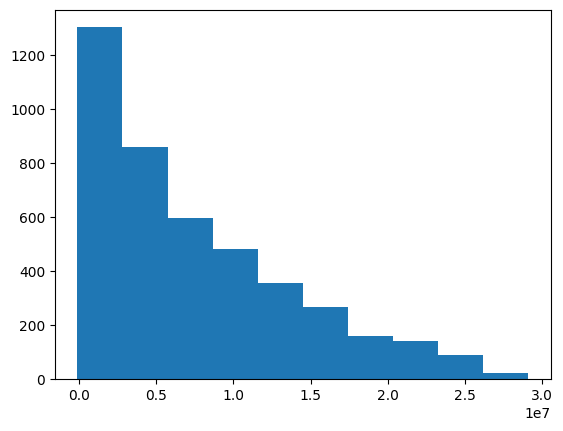

In [42]:
plt.hist(df[' residential_assets_value'])

In [43]:
# Get number of neative values 
len(df[df[' residential_assets_value']<0][' residential_assets_value'])


28

In [44]:
df.info()


# dataset does not contain non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [45]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")



Number of duplicate rows: 0


In [46]:
# For ML tasks we usually need numerical data, this means that it is necessary to somehow convert cateorical variables
# now I have a look at different categories of non-nmerical data, I will implement value_couns function to simultaneously 
# check the class balance

In [47]:
df[' education'].value_counts()

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [48]:
df[' self_employed'].value_counts()

 self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [49]:
df[' loan_status'].value_counts()

# There is a small class imbalance, therefore, no class balancing techniqes is required

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [50]:
# Now, I can start with EDA
# First of all, I googled what is 'cibil_score, it is refered to a credit rating agency in India
# which is a parameter that helps lenders assess the creditworthiness of an individual
# should be therefore very important variable

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

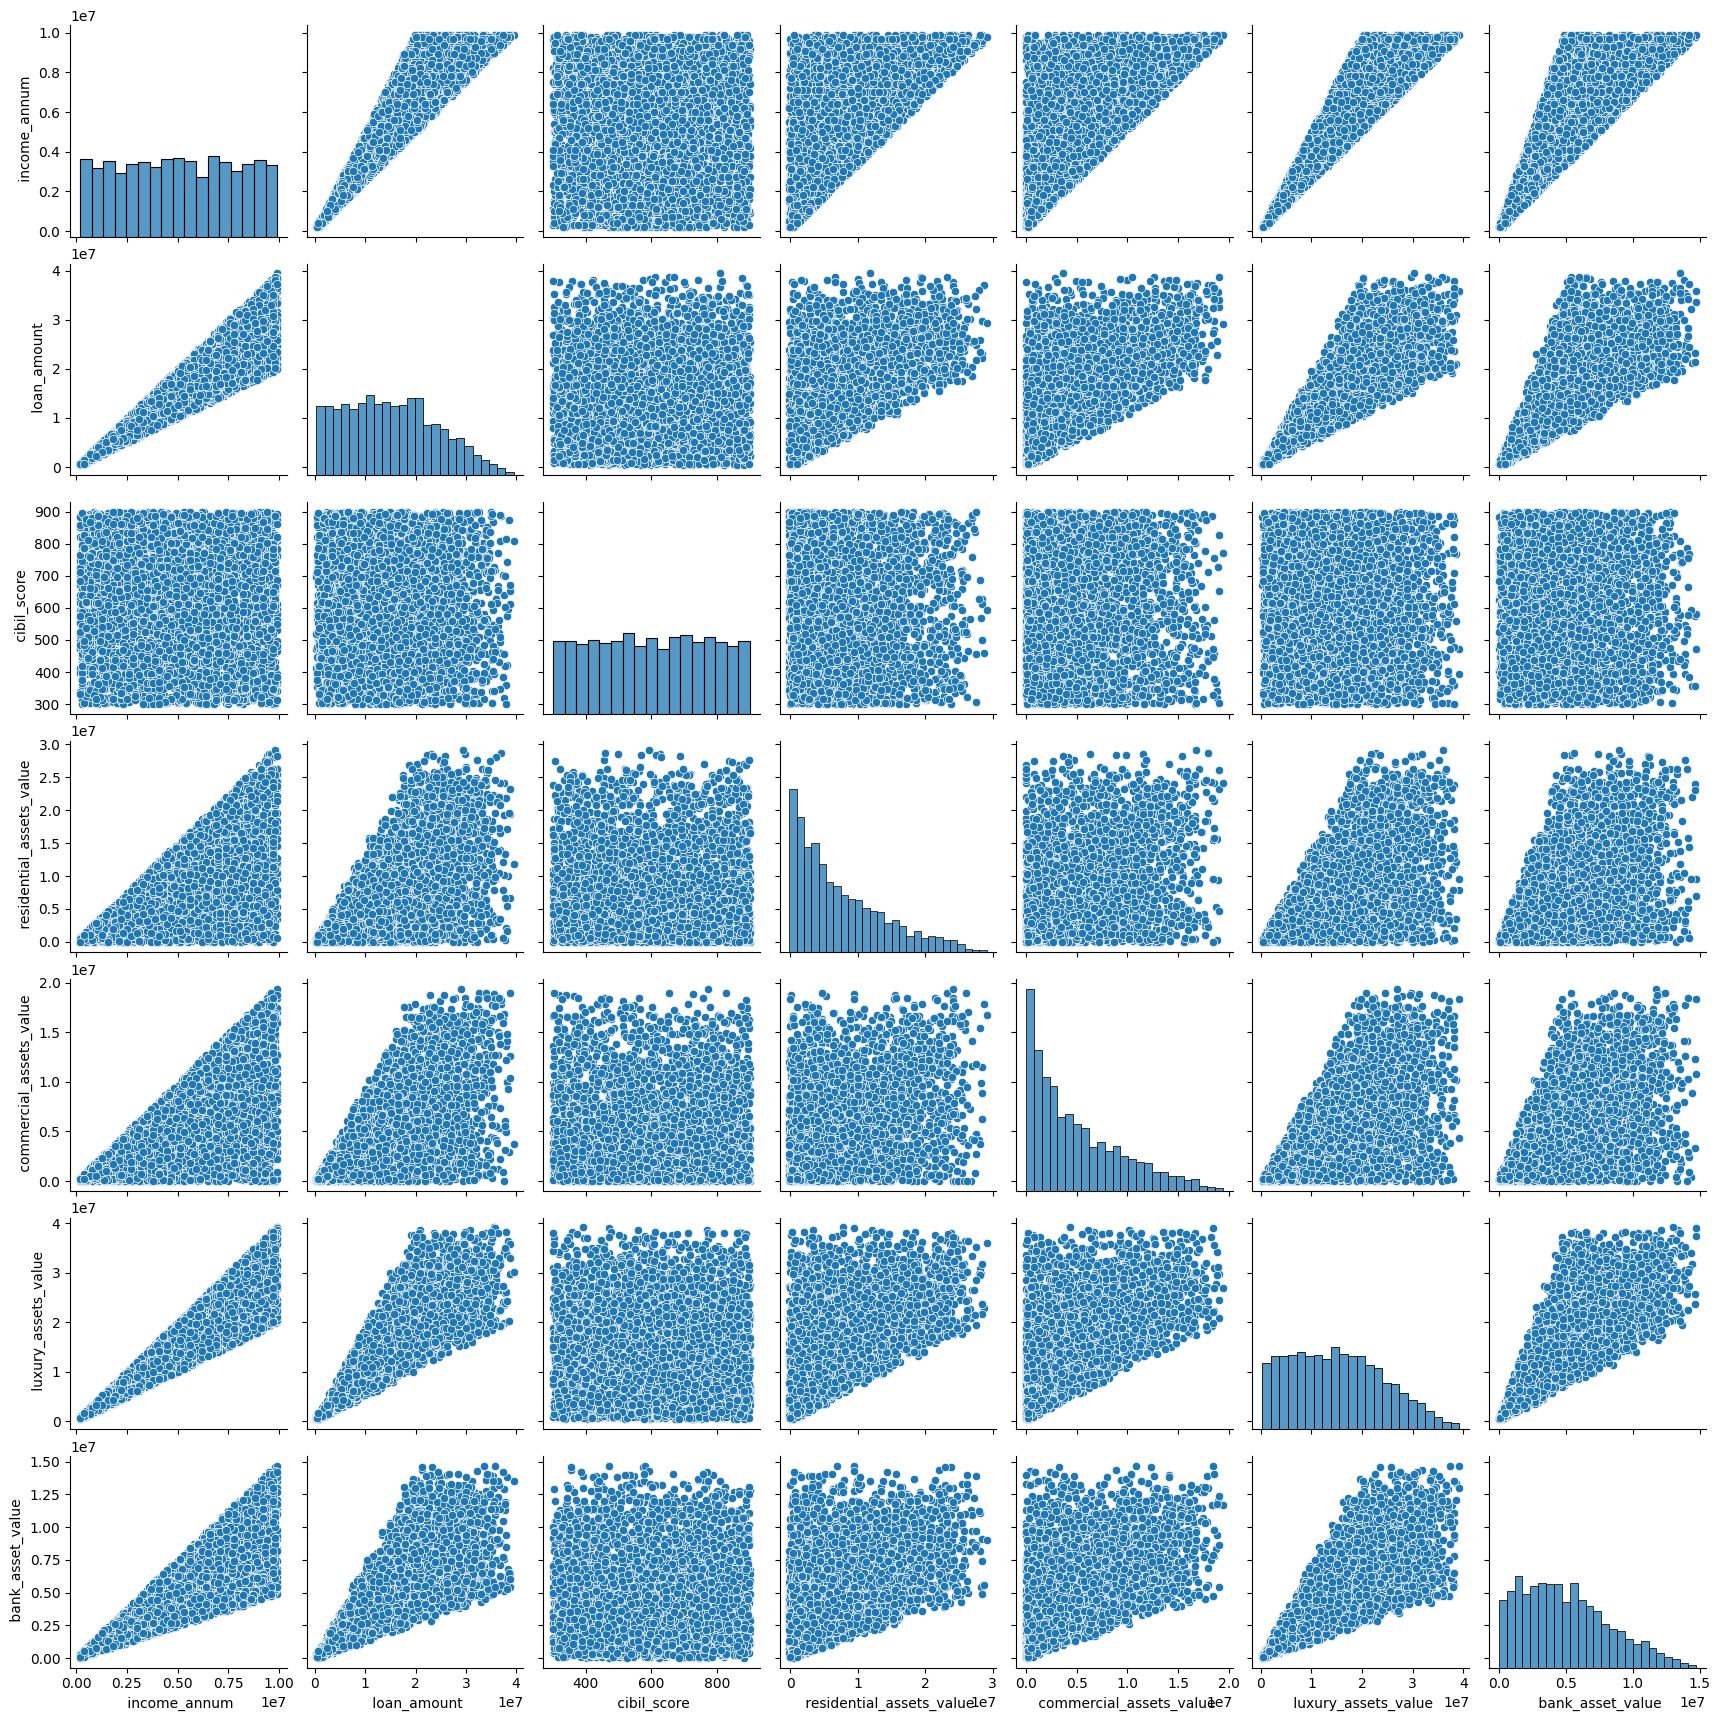

In [51]:
# Firstly, I will plot pairplots for numerical data, whcih give initial insights about the dataset 

import seaborn as sns
columns = [
    ' income_annum', ' loan_amount', ' cibil_score',
    ' residential_assets_value', ' commercial_assets_value', 
    ' luxury_assets_value', ' bank_asset_value'
]

sns.pairplot(df[columns])

# there are several corelated features ' income_annum' AND (' loan_amount', ' luxury_assets_value', ' bank_asset_value')
# ML model can benefit from appling normalization to ' residential_assets_value', ' commercial_assets_value',' luxury_assets_value', ' bank_asset_value'
# cibil_score looks uncorrelated with other parameters


<Axes: xlabel=' income_annum', ylabel=' cibil_score'>

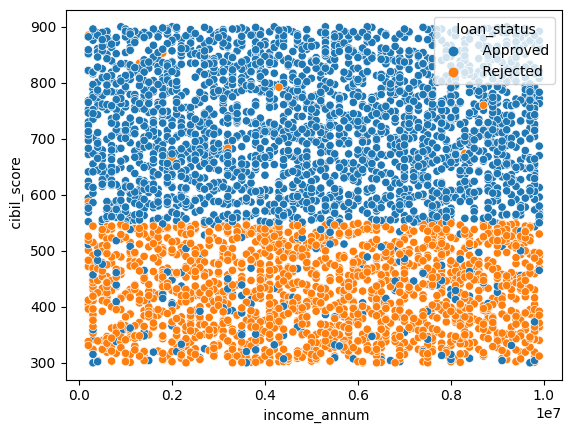

In [52]:
# here I want to have a closer look to relation of  income_annum and  cibil_score
# Now, it is more clear, that there is a boundary between rejected and approved loans (appr 550 cibil_score)
# with some pronounced outliers for rejected loans and high cibil_scores
# There are also quite a lot of approved poins for cibil_score less than 550

sns.scatterplot(x=df[' income_annum'],y=df[' cibil_score'], hue=df[' loan_status'])

In [53]:
# Now I want to examine these outliers

mask = (df[' cibil_score'] > 550) & (df[' loan_status'] == ' Rejected')

df[mask].head(50)



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
67,68,0,Not Graduate,Yes,2700000,10100000,20,693,200000,1700000,5900000,1400000,Rejected
236,237,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
348,349,0,Not Graduate,No,2000000,7000000,6,666,0,1200000,4300000,1400000,Rejected
395,396,2,Graduate,Yes,800000,3200000,10,584,0,200000,2100000,700000,Rejected
559,560,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
911,912,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
1446,1447,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected
1950,1951,0,Graduate,Yes,200000,700000,10,587,-100000,100000,500000,100000,Rejected
2856,2857,3,Not Graduate,Yes,8300000,31400000,6,674,1000000,1600000,17200000,6100000,Rejected
3180,3181,4,Graduate,No,3200000,12200000,14,683,-100000,1100000,7500000,2900000,Rejected


In [54]:
df['income_to_loan_ratio'] = df[' income_annum'] / df[' loan_amount']	

<Axes: xlabel='income_to_loan_ratio', ylabel=' cibil_score'>

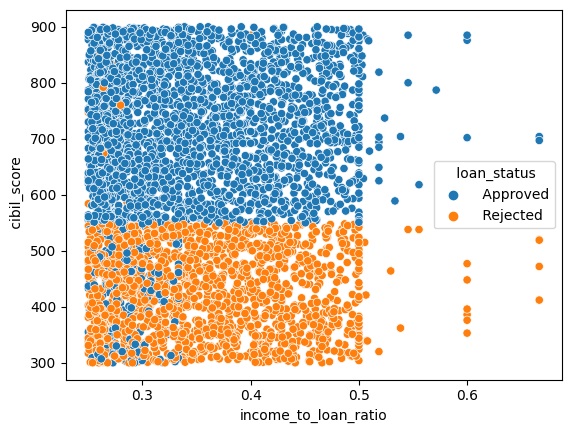

In [55]:
# Now, the scatteplot looks more dense, especially lower part,
# blue points for cibil_score less than 550 is located below income_to_loan_ratio approximatelly 0.32-0.33
sns.scatterplot(x=df['income_to_loan_ratio'],y=df[' cibil_score'], hue=df[' loan_status'])

In [56]:
# Let's look at rejected applications for low income_to_loan_ratio
mask = (df['income_to_loan_ratio']<0.33) & (df[' loan_status'] == ' Rejected')
df[mask].head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_to_loan_ratio
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0.306397
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0.267101
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,0.255814
11,12,2,Not Graduate,Yes,6700000,22700000,18,538,15300000,5800000,20400000,6400000,Rejected,0.295154
14,15,1,Not Graduate,No,1900000,7400000,6,469,1900000,1200000,5900000,1900000,Rejected,0.256757
20,21,2,Graduate,No,5000000,19400000,12,315,9500000,1600000,18000000,6100000,Rejected,0.257732
22,23,4,Graduate,Yes,6500000,25700000,18,311,13100000,1700000,19500000,8500000,Rejected,0.252918
25,26,5,Not Graduate,No,3100000,9500000,20,514,7900000,3100000,6600000,2600000,Rejected,0.326316
28,29,5,Not Graduate,Yes,7000000,24000000,6,336,2300000,11900000,27500000,9700000,Rejected,0.291667
37,38,5,Graduate,Yes,8000000,27200000,6,348,6400000,300000,16700000,7100000,Rejected,0.294118


In [57]:
# Let's look at approved applications for low income_to_loan_ratio
mask = (df['income_to_loan_ratio']<0.33) & (df[' loan_status'] == ' Approved')
df[mask].head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_to_loan_ratio
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0.321070
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,0.263636
10,11,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved,0.258929
13,14,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved,0.288889
16,17,2,Graduate,Yes,500000,1600000,4,663,1300000,100000,1300000,700000,Approved,0.312500
17,18,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved,0.308511
18,19,2,Graduate,No,2700000,10300000,10,736,1000000,0,6200000,3300000,Approved,0.262136
26,27,4,Graduate,No,8200000,28100000,12,696,11500000,10600000,25300000,7200000,Approved,0.291815
29,30,3,Not Graduate,Yes,9000000,31500000,10,850,21800000,12400000,33700000,8000000,Approved,0.285714
36,37,3,Not Graduate,No,1600000,6200000,18,636,3400000,700000,5300000,1400000,Approved,0.258065


<Axes: xlabel=' no_of_dependents', ylabel='income_to_loan_ratio'>

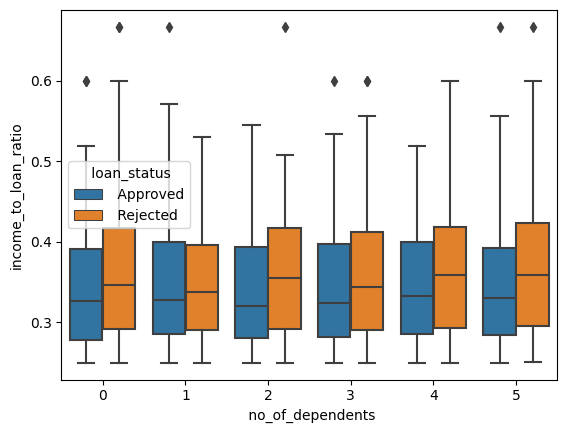

In [58]:
# Nmuber of dependence also impact the result. 
# Rejected have usually higher median value 
sns.boxplot(x=df[' no_of_dependents'],y=df['income_to_loan_ratio'],hue=df[' loan_status'])

In [59]:
# calculate overall assets 
# this is reasonable, should not be a large difference in assets owning
# in addition, it is potentially better for ML learing model to reduce the number of parameters

df['total_assets'] = df[' residential_assets_value']+df[' commercial_assets_value']+df[' luxury_assets_value']+df[' bank_asset_value']

In [60]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4269 non-null   int64  
 1    no_of_dependents          4269 non-null   int64  
 2    education                 4269 non-null   object 
 3    self_employed             4269 non-null   object 
 4    income_annum              4269 non-null   int64  
 5    loan_amount               4269 non-null   int64  
 6    loan_term                 4269 non-null   int64  
 7    cibil_score               4269 non-null   int64  
 8    residential_assets_value  4269 non-null   int64  
 9    commercial_assets_value   4269 non-null   int64  
 10   luxury_assets_value       4269 non-null   int64  
 11   bank_asset_value          4269 non-null   int64  
 12   loan_status               4269 non-null   object 
 13  income_to_loan_ratio       4269 non-null   float

In [61]:
# Now I will conver categorical variables (education,self_employed) to numerical values

def numerization(data,columns,dict_list_1):
    for i in range(len(columns)):
        data[columns[i]]=data[columns[i]].replace(dict_list_1[i])

dict_col= [{' Not Graduate':0,' Graduate':1},{' No':0,' Yes':1},{' Rejected':0,' Approved':1}] 
numerization(df,[' education',' self_employed',' loan_status'],dict_col)

In [62]:
# here I drop assets because they are incorporated in total_assets, and non-descriptive loan_id 
# also remove  loan_amount, because the table contains income_to_loan_ratio, which makes these columns hghly correlated
df_new = df.drop(columns=[' loan_amount','loan_id',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value'])

In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    no_of_dependents     4269 non-null   int64  
 1    education            4269 non-null   int64  
 2    self_employed        4269 non-null   int64  
 3    income_annum         4269 non-null   int64  
 4    loan_term            4269 non-null   int64  
 5    cibil_score          4269 non-null   int64  
 6    loan_status          4269 non-null   int64  
 7   income_to_loan_ratio  4269 non-null   float64
 8   total_assets          4269 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 300.3 KB


In [64]:
# The metric for the model depends on business requirements
# It can be make the number of false positives as small as possible, or maximize f1-score
# here I am going to optimize presision 
# I will train Random Forest model which is simple, easy interpretable and powerful
# in addition it does not require feature scaling and normalizing the distribution of the features

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score
import numpy as np

# Assuming 'df' is your DataFrame
# Replace 'loan_status' with the target column in your data if it differs
target = ' loan_status'  # Ensure there are no leading spaces
X = df_new.drop(columns=[target])  # Features
y = df_new[target]  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV with regularization parameters
param_grid = {
    'n_estimators': [50, 100],          # Number of trees
    'max_depth': [3, 4, 5],             # Maximum depth of each tree
    'min_samples_split': [5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [2, 4],         # Minimum samples per leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for each split
    'max_samples': [0.8, 1.0],          # Fraction of samples used to train each tree
}

# GridSearchCV with 5-fold cross-validation, optimized for precision
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='precision')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Predict on the test set (using default threshold of 0.5)
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Precision on Test Set:", precision_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'max_samples': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Precision on Test Set: 0.9922027290448343

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       323
           1       0.99      0.96      0.98       531

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



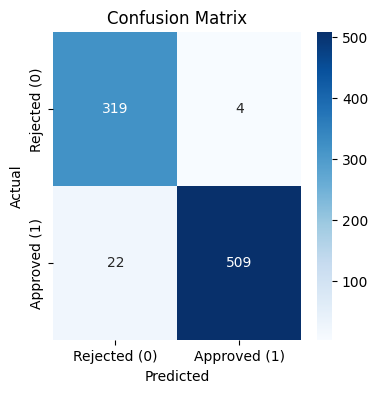

In [66]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected (0)', 'Approved (1)'], yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

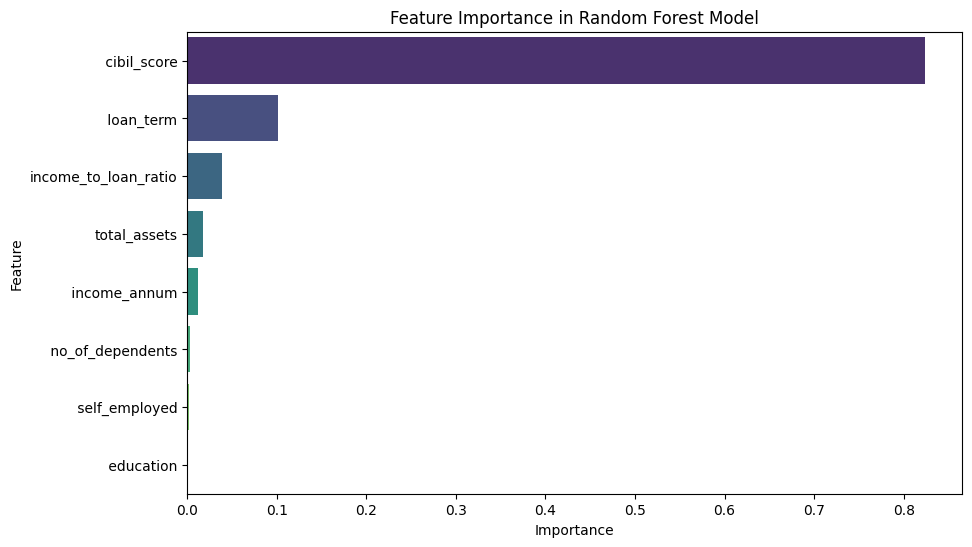

In [67]:
# Plot Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In this project, I investigated the factors influencing loan approval or rejection. The dataset was well-structured, and therefore, tasks like handling missing data or removing duplicates were not necessary.

Through exploratory data analysis (EDA), I discovered that loan rejection events were extremely rare for individuals with a CIBIL score greater than 550. This insight guided further feature engineering, where I created new features such as the income-to-loan ratio and merged different types of assets.

The next step was building a Random Forest Classifier model, with the target metric being precision. This choice ensures that when the model predicts a loan approval (class 1), it is highly likely to be correct.

The model demonstrated strong performance, achieving a precision rate above 99% on the test dataset. The most important feature in the model was the CIBIL score, which aligns with the findings from the EDA, where a clear decision boundary around a score of 550 was observed. Following this, loan term and income-to-loan ratio were identified as the next most influential factors.
